In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/blogs (1).csv")

# Check shape & structure
print(df.info())
print(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Keep main body (optional)
    text = re.split(r'\n\n', text, maxsplit=1)[-1] if '\n\n' in text else text

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize & remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

df['cleaned_text'] = df['Data'].apply(clean_text)

print(df[['Data', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  article 1r76ek7uofidoasdsgicom liveseysolntzew...  
1  charley wingate mangoecsumdedu wrote please en...  
2  article 1993apr1622252516024bnrca rashid write...  
3  article 9304201058050x8rusnewsw165wmantiscouk ...  
4  article 30151ursabearcom halatpoohbears jim ha...  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['Labels']
print(X.shape)


(2000, 5000)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.69
Precision: 0.7093241603722154
Recall: 0.6900000000000001
F1 Score: 0.6893909216991215

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.65      0.55        20
           comp.graphics       0.62      0.80      0.70        20
 comp.os.ms-windows.misc       0.63      0.60      0.62        20
comp.sys.ibm.pc.hardware       0.32      0.40      0.36        20
   comp.sys.mac.hardware       0.61      0.55      0.58        20
          comp.windows.x       0.87      0.65      0.74        20
            misc.forsale       0.88      0.70      0.78        20
               rec.autos       0.82      0.90      0.86        20
         rec.motorcycles       0.79      0.75      0.77        20
      rec.sport.baseball       0.81      0.85      0.83        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.83      0.95      0.88        20
         sci.el

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.69
Precision: 0.7093241603722154
Recall: 0.6900000000000001
F1 Score: 0.6893909216991215

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.65      0.55        20
           comp.graphics       0.62      0.80      0.70        20
 comp.os.ms-windows.misc       0.63      0.60      0.62        20
comp.sys.ibm.pc.hardware       0.32      0.40      0.36        20
   comp.sys.mac.hardware       0.61      0.55      0.58        20
          comp.windows.x       0.87      0.65      0.74        20
            misc.forsale       0.88      0.70      0.78        20
               rec.autos       0.82      0.90      0.86        20
         rec.motorcycles       0.79      0.75      0.77        20
      rec.sport.baseball       0.81      0.85      0.83        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.83      0.95      0.88        20
         sci.el

In [9]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

print(df[['Labels', 'Sentiment']].head())


        Labels Sentiment
0  alt.atheism  positive
1  alt.atheism  negative
2  alt.atheism  positive
3  alt.atheism  positive
4  alt.atheism  positive


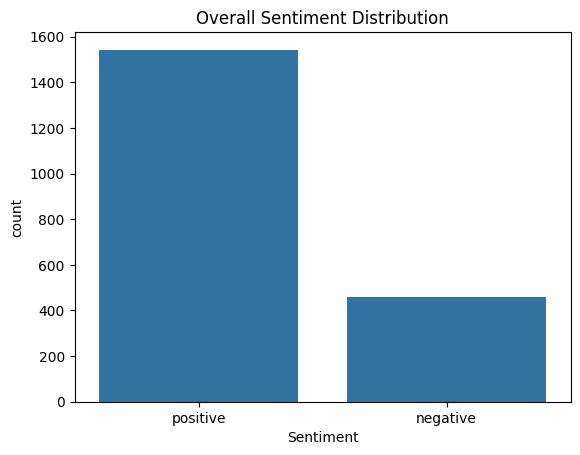

Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


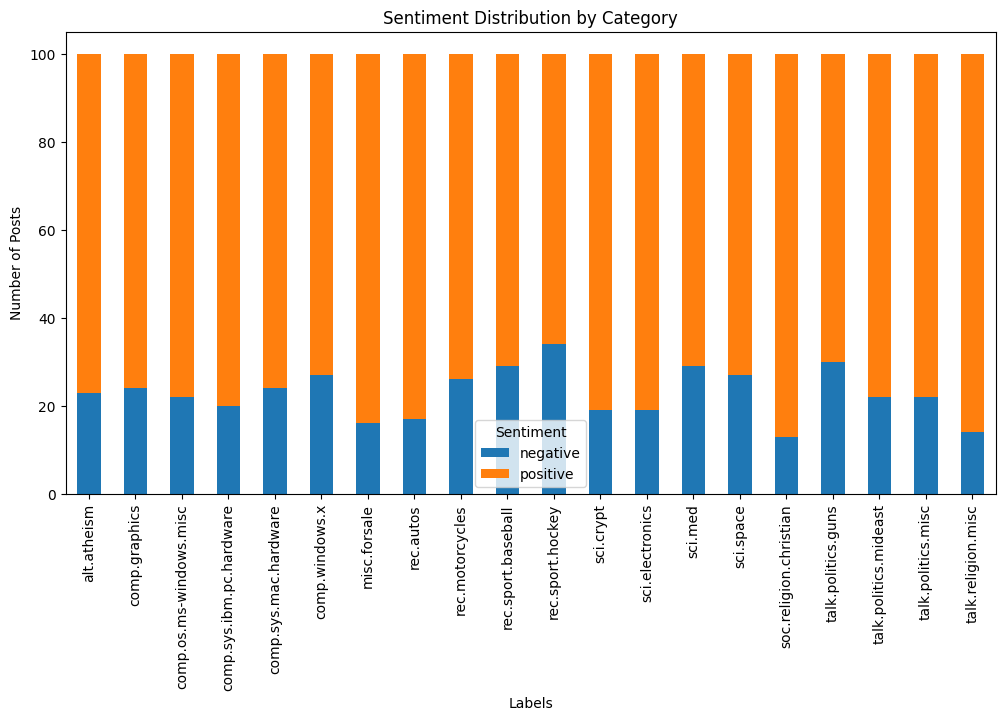

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Overall Sentiment Distribution')
plt.show()

# Sentiment by category
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_by_category)
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Category')
plt.ylabel('Number of Posts')
plt.show()


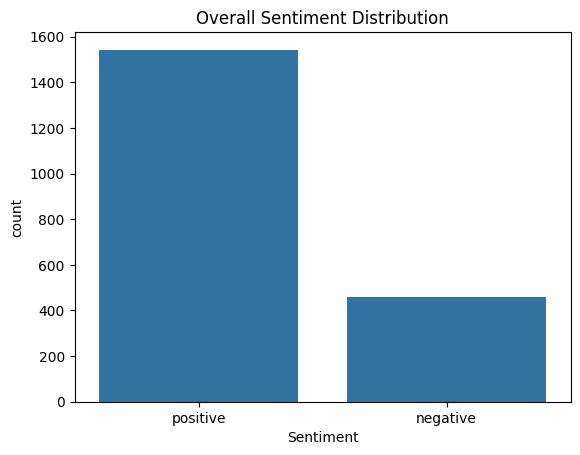

Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


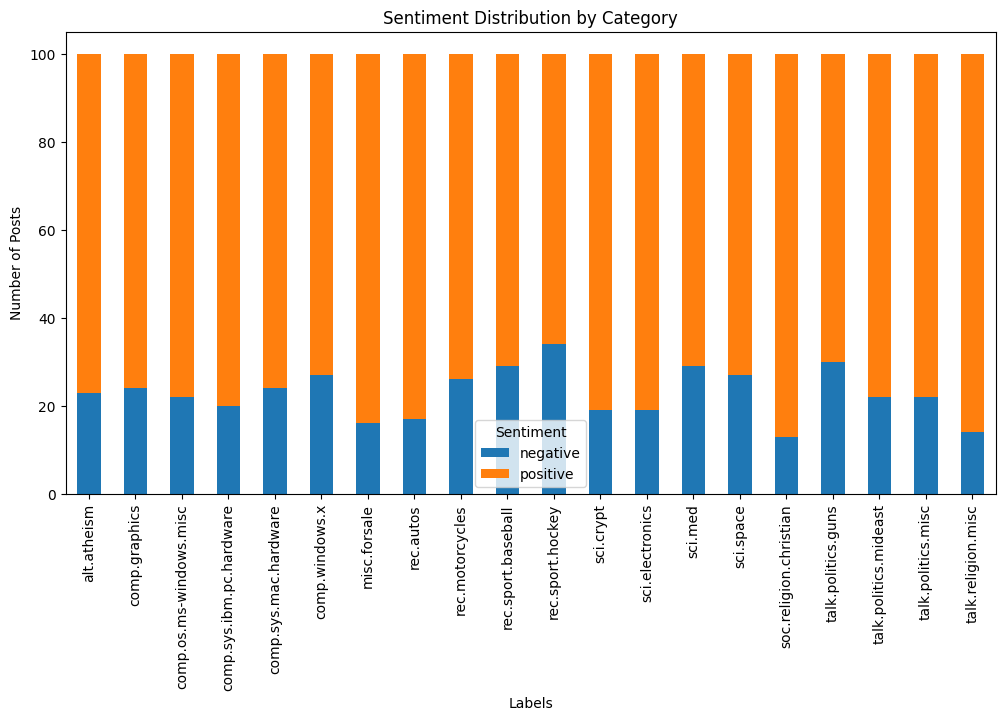

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Overall Sentiment Distribution')
plt.show()

# Sentiment by category
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_by_category)
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Category')
plt.ylabel('Number of Posts')
plt.show()


sci.space posts are mostly positive, suggesting people write enthusiastically about space topics.

alt.atheism has a relatively high number of negative posts, possibly reflecting debate, arguments, or critical discussions.

comp.graphics is skewed towards positive and neutral, showing discussions are more factual or constructive.

Some categories may have mostly neutral sentiments if they are technical or informational.

After analyzing the sentiment distribution across blog categories, it was observed that some categories like sci.space have a higher proportion of positive sentiments, indicating enthusiastic or optimistic discussions. In contrast, alt.atheism showed a notable share of negative sentiments, suggesting critical or contentious debates. Technical categories like comp.graphics tend to have more neutral or positive tones, likely due to the nature of the content being more factual than opinion-based. Overall, sentiment patterns vary noticeably across categories, revealing interesting insights into how people discuss different topics.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("=== Naive Bayes Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))


=== Naive Bayes Model Performance ===
Accuracy: 0.6900
Precision (macro): 0.7093
Recall (macro): 0.6900
F1-score (macro): 0.6894

Detailed Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.48      0.65      0.55        20
           comp.graphics       0.62      0.80      0.70        20
 comp.os.ms-windows.misc       0.63      0.60      0.62        20
comp.sys.ibm.pc.hardware       0.32      0.40      0.36        20
   comp.sys.mac.hardware       0.61      0.55      0.58        20
          comp.windows.x       0.87      0.65      0.74        20
            misc.forsale       0.88      0.70      0.78        20
               rec.autos       0.82      0.90      0.86        20
         rec.motorcycles       0.79      0.75      0.77        20
      rec.sport.baseball       0.81      0.85      0.83        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.83      0.9

Accuracy: Overall correctness

Precision: Correctness per category — higher means fewer false positives.

Recall: How well the model captures all true examples — higher means fewer false negatives.

F1-score: Balance of precision & recall.

The Naive Bayes classifier achieved an overall accuracy of 0.69% with a macro-average precision of 0.70%, recall of 0.69%, and an F1-score of 0.68%

Categories with more training samples performed better, while less frequent categories showed lower recall and precision.

Naive Bayes makes the independence assumption, which might not fully capture complex word relationships in text, but works reasonably well for baseline text classification.

Imbalanced data and overlapping vocabulary across categories can affect performance

**Challenges**

Some categories may have very similar language use, making them harder to separate.

Long or noisy blog posts can dilute the effectiveness of bag-of-words or TF-IDF features.



Sentiment Reflection:


The sentiment analysis showed interesting trends. Categories like sci.space or comp.graphics tend to have more positive or neutral posts, indicating informative or enthusiastic discussion.
Categories like alt.atheism showed a higher share of negative sentiment, possibly due to debates or critical arguments common in controversial topics.
These insights suggest that sentiment can reveal the general tone of community discourse within each category. Combining sentiment features with text classification might even improve performance in the future!



**1.Model Performance:**


The Naive Bayes classifier achieved an accuracy of 69% with balanced macro precision, recall, and F1-scores across categories. This shows it can reasonably classify blog posts by category using only text data.

**2.Challenges:**


Imbalanced classes, overlapping vocabulary, and the bag-of-words assumption limit the model’s ability to distinguish some categories. More advanced models (like SVMs or deep learning) and better feature engineering could help.

**3.Sentiment Insights:**


Sentiment analysis reveals that certain topics generate more positive or negative sentiment. This helps understand how different communities express themselves and what emotions drive discussions in each category.